In [ ]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from helper_files.plotting_functions import get_opponent_df, generate_fv_grid, plot_heatmap, generate_cp_grid
from helper_files.etv_model import ETVModel

/Users/bradeneberhard/miniforge3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

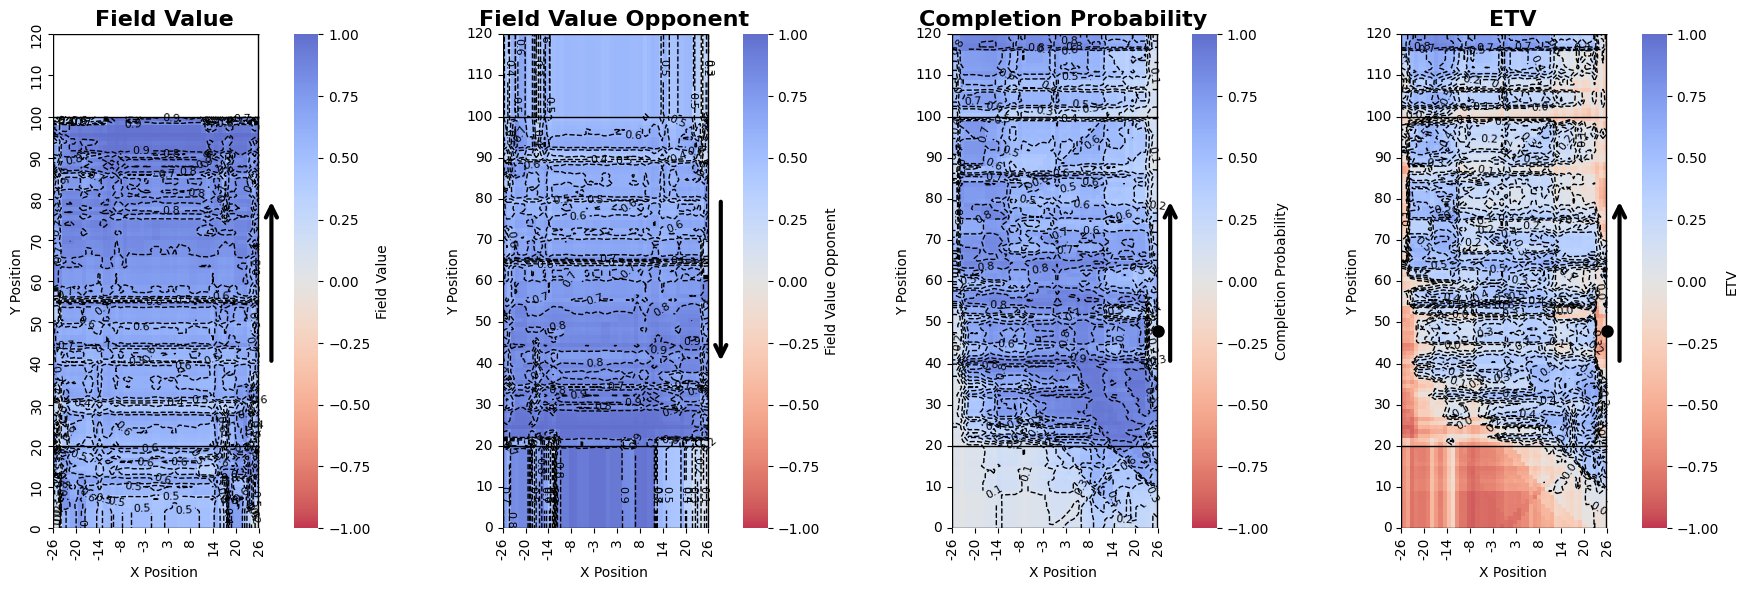

In [3]:
models = joblib.load('../data/models/xgb_models_auc.jblb')
defaults = {'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':11}
sigma = 0
thrower_x, thrower_y = 50, 48 
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])
etv_model = ETVModel(models['cp_model'], models['fv_model'])
etv = etv_model.predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()


/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

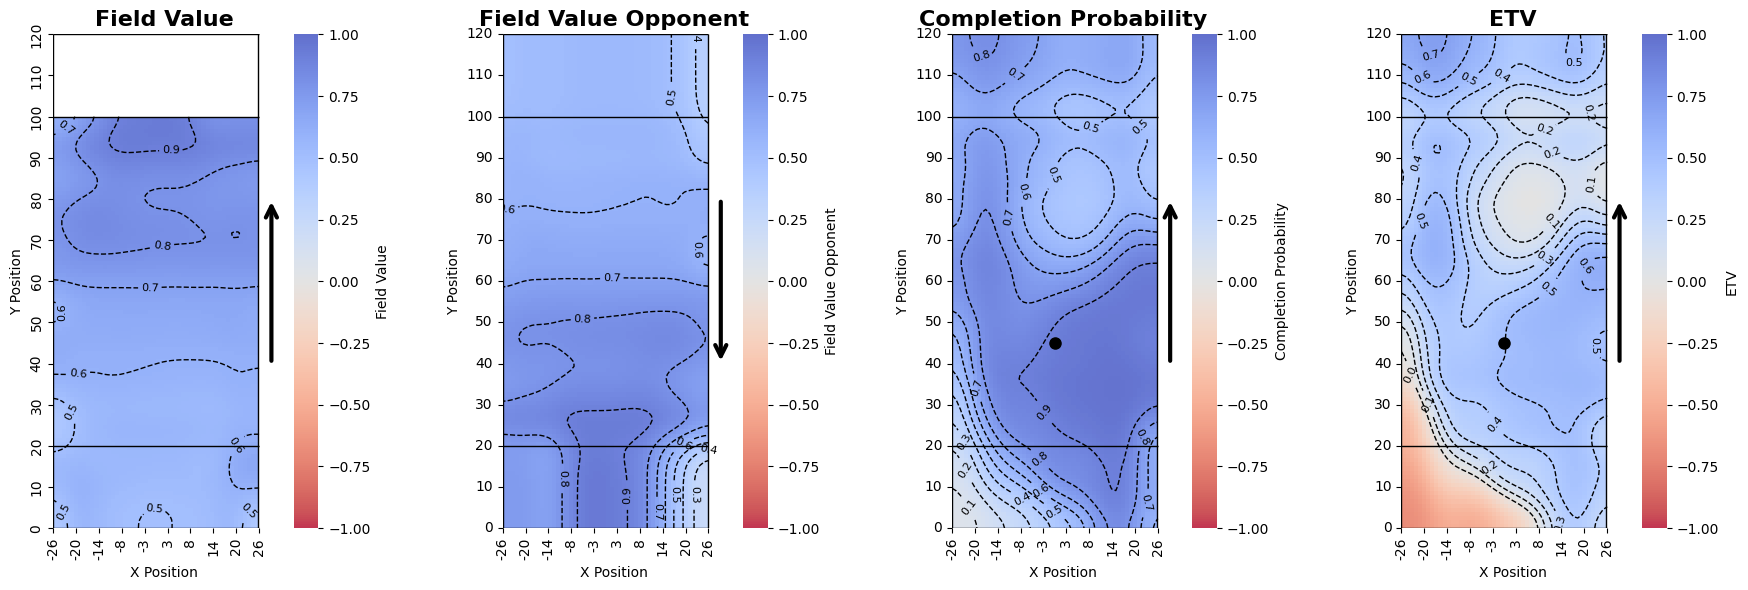

In [3]:
models = joblib.load('../data/models/xgb_models_auc.jblb')
defaults = {'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':11}
sigma = 4
thrower_x, thrower_y = 25, 45
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])
etv_model = ETVModel(models['cp_model'], models['fv_model'])
etv = etv_model.predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()


/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

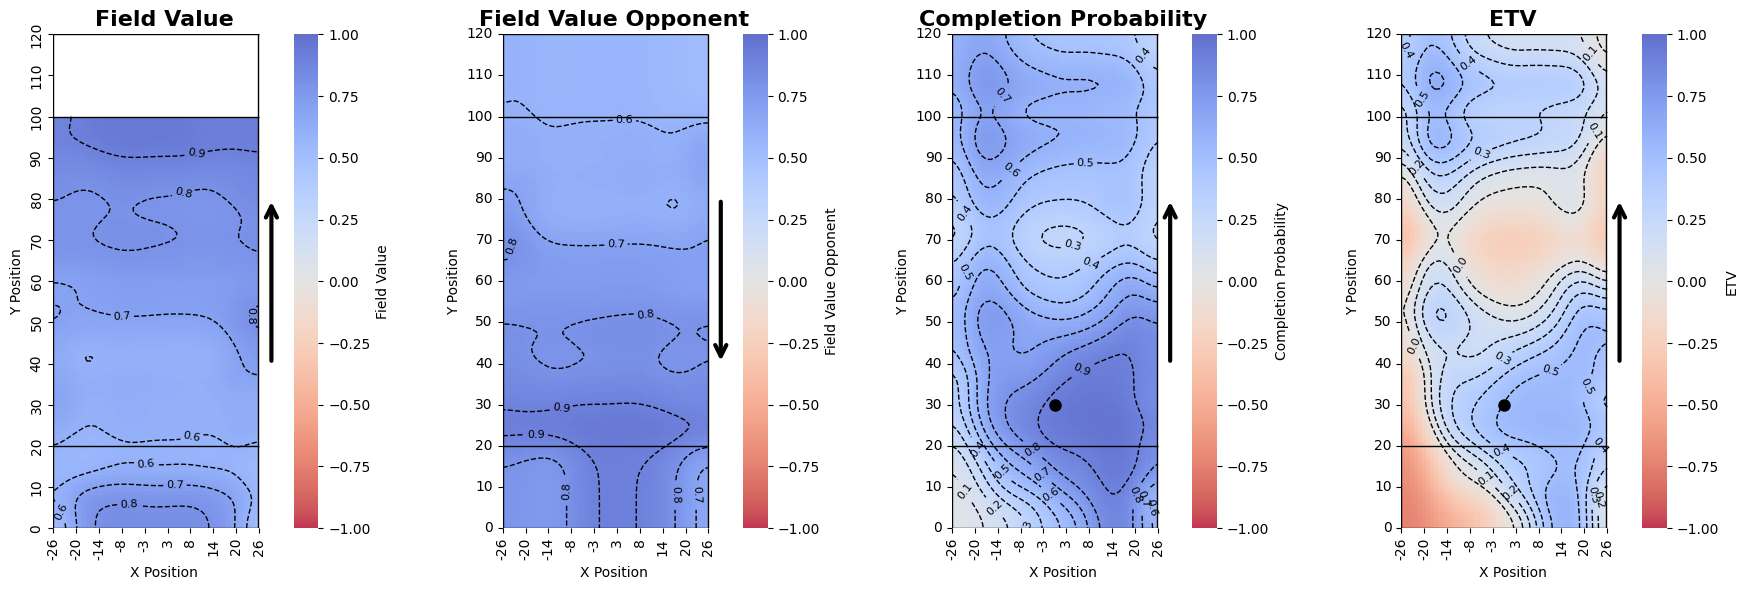

In [4]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':10}
sigma = 4
thrower_x, thrower_y = 25, 30
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()

/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

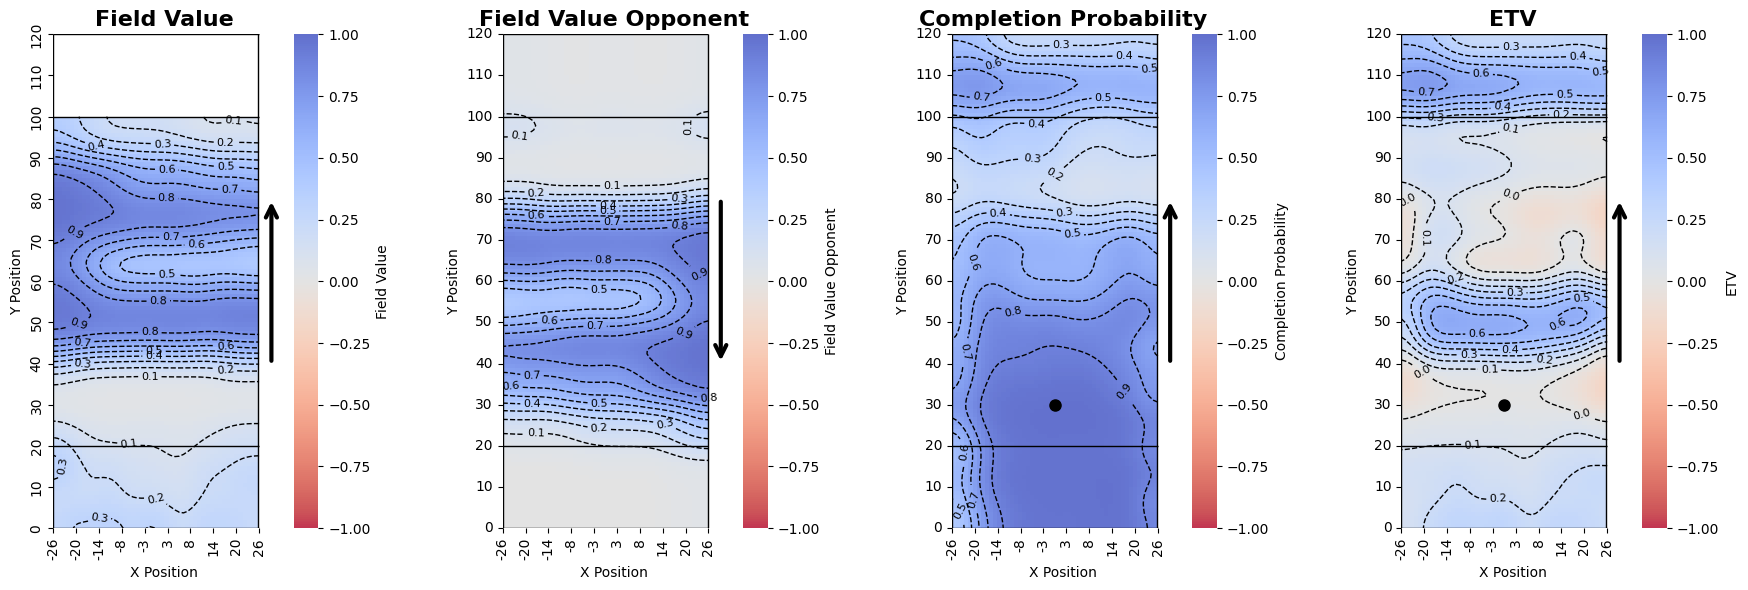

In [8]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':0.001}
sigma = 4
thrower_x, thrower_y = 25, 30
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()

/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

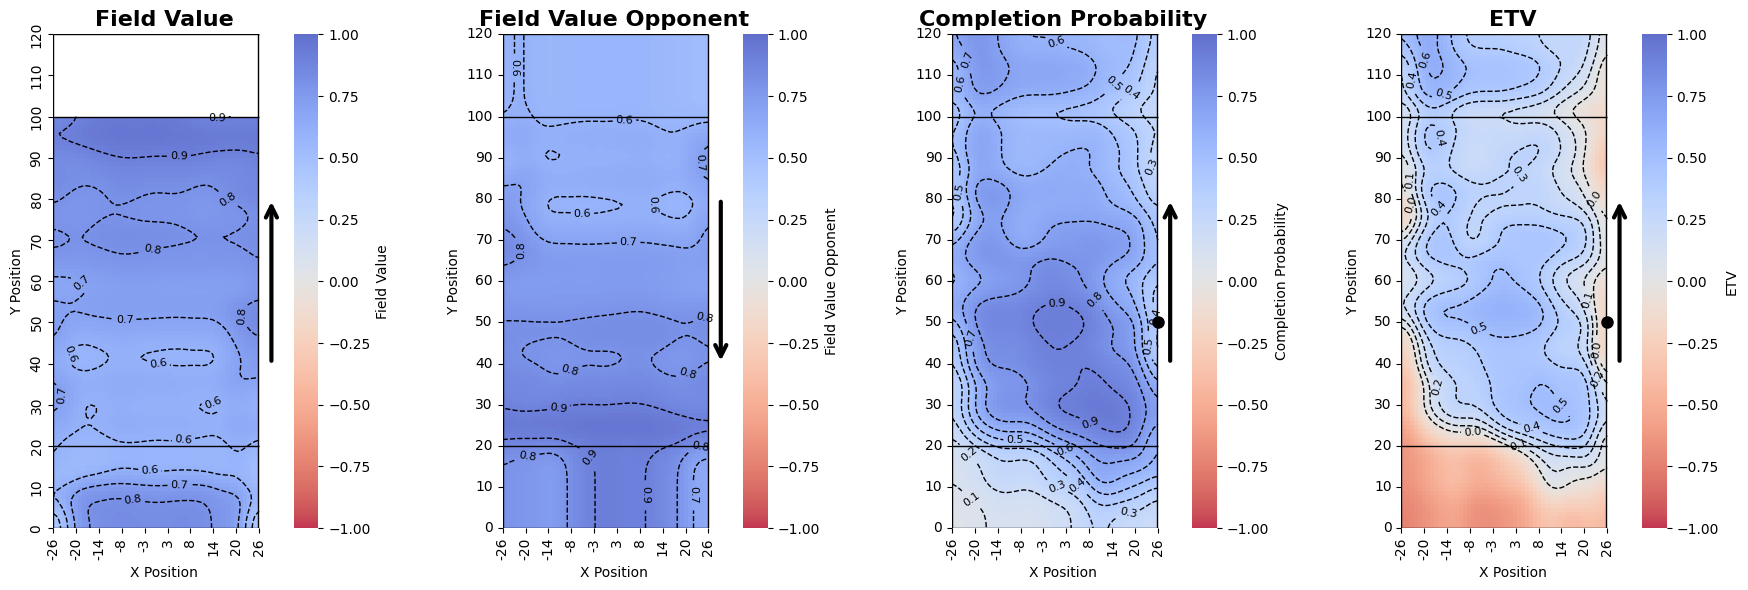

In [5]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':10}
sigma = 3
thrower_x, thrower_y = 50, 50
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()

/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_x'] = -opponent_df.loc[:, 'receiver_x']
/Users/bradeneberhard/xai3_modules/Expected Throw Value/figures/../helper_files/plotting_functions.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_df.loc[:, 'receiver_y'] = (120 - opponent_df.loc[:, 'receiver_y']).clip(lower=20, upper=100)
/Users/bradeneberhard/xai3_modules/Ex

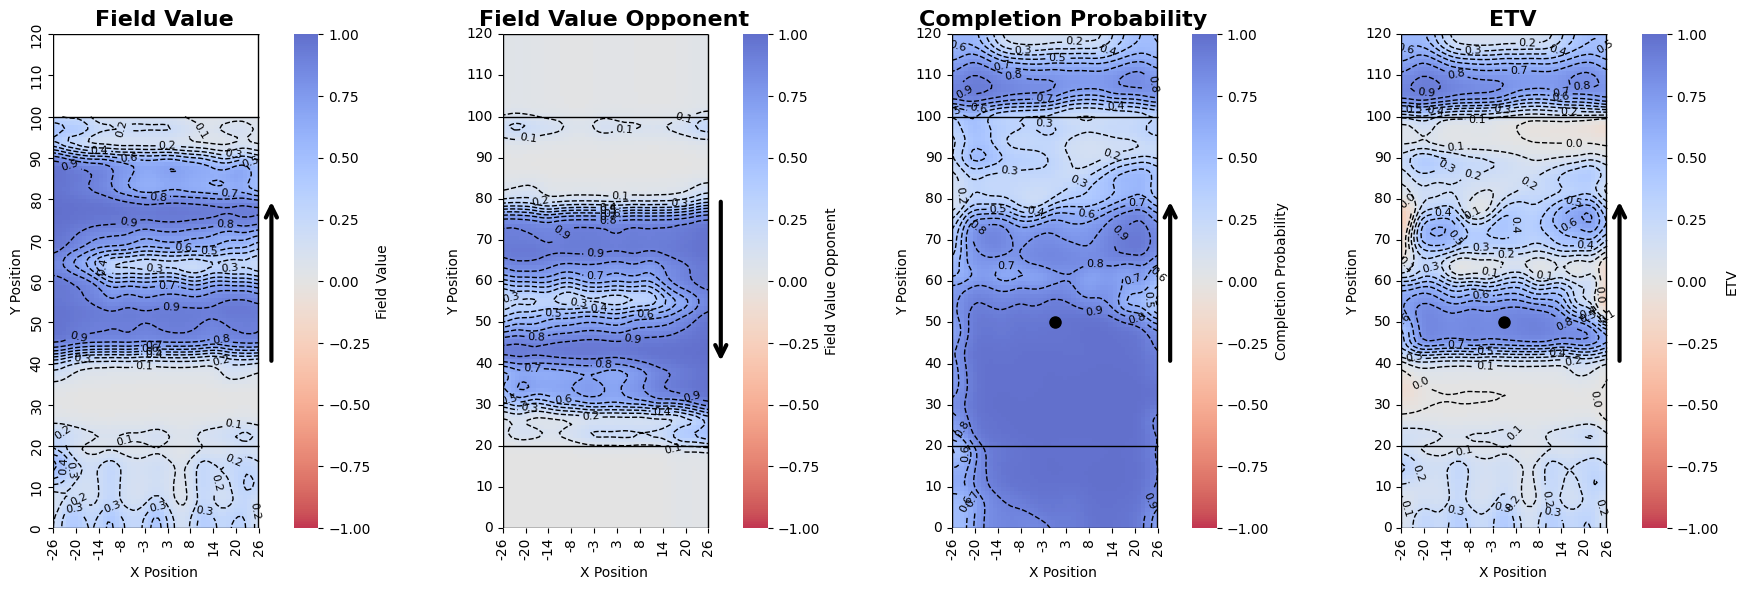

In [6]:
defaults = {'possession_num':1, 'possession_throw':1,'game_quarter':1, 'quarter_point':1,'score_diff':0,'times':0.0001}
sigma = 2
thrower_x, thrower_y = 25, 50
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

fv_grid = generate_fv_grid(-26.66, 26.67, 0, 100, 50, 100, default_columns=defaults)[models['fv_model']['features']]
fv = plot_heatmap(models['fv_model']['model'], fv_grid, 50, 100, title='Field Value', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[0])

cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)[models['cp_model']['features']]
cp = plot_heatmap(models['cp_model']['model'], cp_grid[models['cp_model']['features']], 50, 120, title='Completion Probability', scaler=models['cp_model']['scaler'], sigma=sigma, ax=axes[2], highlight_point=(thrower_x, thrower_y))

opponent_df = get_opponent_df(cp_grid)[models['fv_model']['features']]
fv_opponent = plot_heatmap(models['fv_model']['model'], opponent_df, 50, 120, title='Field Value Opponent', scaler=models['fv_model']['scaler'], sigma=sigma, ax=axes[1])

etv = models['etv_model'].predict(cp_grid).reshape(120,50)
plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, ax=axes[3], highlight_point=(thrower_x, thrower_y))
plt.tight_layout()
plt.show()

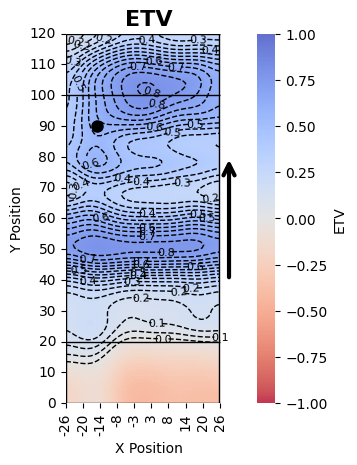

In [7]:
defaults = {'possession_num':1, 'possession_throw':4,'game_quarter':4, 'quarter_point':1,'score_diff':0,'times':0.01}
sigma = 5
thrower_x, thrower_y = 10, 90
cp_grid = generate_cp_grid(thrower_x=thrower_x, thrower_y=thrower_y, default_columns=defaults)
etv = models['etv_model'].predict(cp_grid).reshape(120,50)
_ = plot_heatmap(None, etv, 50, 120, title='ETV', sigma=sigma, highlight_point=(thrower_x, thrower_y), contour_every=0.05)